Accuracy: 0.8737373737373737
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       280
           1       0.92      0.84      0.88       314

    accuracy                           0.87       594
   macro avg       0.88      0.88      0.87       594
weighted avg       0.88      0.87      0.87       594



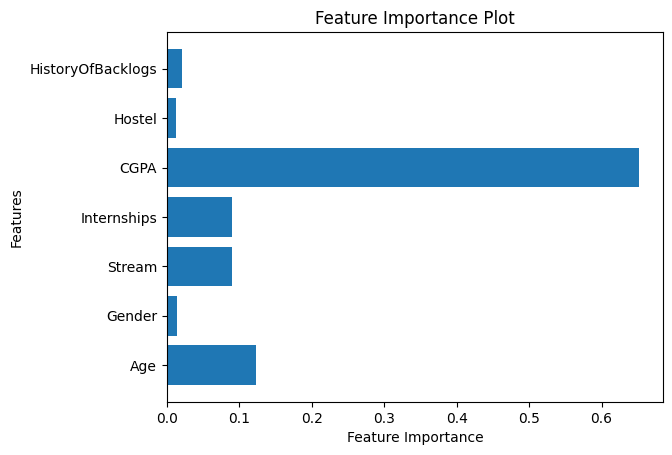

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/Maimuna Ashfaq/Desktop/collegePlace.csv")

# Preprocessing
data = data.dropna()  # Remove rows with missing values
le = LabelEncoder()
data['Age'] = le.fit_transform(data['Age'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Stream'] = le.fit_transform(data['Stream'])
data['Internships'] = le.fit_transform(data['Internships'])
data['CGPA'] = le.fit_transform(data['CGPA'])
data['Hostel'] = le.fit_transform(data['Hostel'])
data['HistoryOfBacklogs'] = le.fit_transform(data['HistoryOfBacklogs'])
data['PlacedOrNot'] = le.fit_transform(data['PlacedOrNot'])
X = data.drop('PlacedOrNot', axis=1)
y = data['PlacedOrNot']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

# Feature importances
feature_importances = model.feature_importances_
features = X.columns

# Visualize feature importances
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()